# 주식 데이터 수집하기

## 1. Finance Data Reader

* http://github.com/FinanceData/FinanceDataReader

In [1]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

In [3]:
df = fdr.DataReader('005930')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-23,643,662,624,649,1719730,NaN
1998-09-24,726,726,708,727,1115300,0.120185
1998-09-25,747,761,717,727,1565830,0.000000
1998-09-26,718,733,712,730,299970,0.004127
1998-09-28,741,756,712,713,543070,-0.023288


주식 그래프 그리기

* https://github.com/charlesdong1991/StockInsider

In [5]:
!pip install StockInsider

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for StockInsider: filename=StockInsider-0.2.0-py3-none-any.whl size=22030 sha256=18fd85c6c2fa3377d57fde54a8165a762cfe7485f0806d3eb6e6706eac4cab06
  Stored in directory: /root/.cache/pip/wheels/85/64/6f/de6d980e06f9ddbc8bbc2bb9402f23faf78e890de3efe82bd4
Successfully built StockInsider


In [6]:
from insider import StockInsider

In [7]:
def get_stock(code):
    import FinanceDataReader as fdr
    from insider import StockInsider
    import os

    df = fdr.DataReader(code)
    df["day"] = df.index
    df.columns = ['open', 'close', 'high', 'low', 'volumn' ,'price_change', 'day']

    df['ma5'] = df['close'].rolling(5).mean()
    df['ma10'] = df['close'].rolling(10).mean()
    df['ma20'] = df['close'].rolling(20).mean()
    df['v_ma5'] = df['volumn'].rolling(5).mean()
    df['v_ma10'] = df['volumn'].rolling(10).mean()
    df['v_ma20'] = df['volumn'].rolling(20).mean()
    df['percent_change'] = df['close'].pct_change()

    if os.path.exists("./data") == False:
        os.mkdir("./data")

    df.to_csv("./data/{}.csv".format(code))
    fpath = "./data/{}.csv".format(code)
    si = StockInsider.from_external_csv_data(fpath=fpath, code=code)

    return si


In [9]:
df = get_stock('005930')

In [10]:
df.plot(head=100)

In [11]:
df.plot_macd()

In [12]:
df.plot_rsi()

## 2. 미국주식 데이터 수집

In [13]:
fdr.DataReader('AAPL')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


Tiingo를 사용해봅니다.

* API를 발급받습니다.

In [14]:
TIINGO_API_KEY = "efd3d31c62bc4f2bace259b4de92b73f4c2d3257"

In [15]:
import pandas_datareader as pdr

df = pdr.get_data_tiingo("KO", api_key=TIINGO_API_KEY)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



close   high    low   open    volume  \
symbol date                                                              
KO     2017-12-27 00:00:00+00:00  45.93  45.94  45.72  45.90   5041455   
       2017-12-28 00:00:00+00:00  45.72  45.99  45.64  45.91   5642213   
       2017-12-29 00:00:00+00:00  45.88  46.18  45.69  45.70   8293714   
       2018-01-02 00:00:00+00:00  45.54  45.94  45.51  45.91  10721081   
       2018-01-03 00:00:00+00:00  45.44  45.69  45.34  45.49  12287091   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
KO     2017-12-27 00:00:00+00:00  39.165881  39.174408  38.986808  39.140299   
       2017-12-28 00:00:00+00:00  38.986808  39.217045  38.918589  39.148826   
       2017-12-29 00:00:00+00:00  39.123244  39.379063  38.961226  38.969753   
       2018-01-02 00:00:00+00:00  38.833316  39.174408  38.807734  39.148826   
       2018-01-03 00:00:00+00:00  38.748043  38.961226  38.662770  38.790680   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
KO     2017-12-27 00:00:00+00:00    5041455      0.0          1.0  
       2017-12-28 00:00:00+00:00    5642213      0.0          1.0  
       2017-12-29 00:00:00+00:00    8293714      0.0          1.0  
       2018-01-02 00:00:00+00:00   10721081      0.0          1.0  
       2018-01-03 00:00:00+00:00   12287091      0.0          1.0

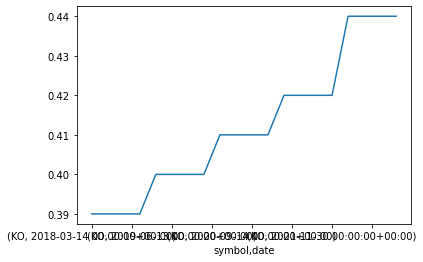

In [16]:
temp = df[df['divCash']!=0]
temp['divCash'].plot(kind='line')